In [48]:
!wget https://raw.githubusercontent.com/jesussantiyan/2022MachineLearningTechniques/main/Project%203/products.csv

--2023-01-23 18:50:29--  https://raw.githubusercontent.com/jesussantiyan/2022MachineLearningTechniques/main/Project%203/products.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25502609 (24M) [text/plain]
Saving to: ‘products.csv’

products.csv        100%[===================>]  24.32M  --.-KB/s    in 0.09s   

2023-01-23 18:50:31 (270 MB/s) - ‘products.csv’ saved [25502609/25502609]



In [87]:
import pandas as pd
import re


df = pd.read_csv("products.csv", sep=';',encoding='latin1')

df.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], inplace = True,axis=1)
df.head()
df2 = df[['Summary','Text']]
df['Summary+Text'] = df["Summary"].str.cat(df["Text"], sep =' ')
df.head()
df.dropna(inplace = True)
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
import nltk
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

False

In [88]:

from nltk.stem import WordNetLemmatizer


#Lemmatization
lemmatizer = WordNetLemmatizer()
lem_all = []
for comment in df['Summary+Text'].values:
  lem_comment = []
  for token in comment.split():
    lem_comment.append(lemmatizer.lemmatize(token, pos='v'))
  lem_all.append(' '.join(lem_comment))

df['Summary+Text'] = lem_all

In [89]:
#contractions 

contractions_list = [
    (r'ain\'t','am not'), (r'aren\'t','are not'),(r'can\'t','cannot'),(r'could\'ve','could have'),(r'couldn\'t','could not'),(r'didn\'t','did not'),
    (r'doesn\'t','does not'),(r'don\'t','do not'),(r'hadn\'t','had not'),(r'hasn\'t','has not'),(r'haven\'t','have not'),(r'he\'d','he would'),
    (r'he\'ll','he will'),(r'he\'s','he is'),(r'how\'d','how did'),(r'how\'ll','how will'),(r'how\'s','how is'),(r'I\'d','I would'),(r'I\'ll','I will'),
    (r'I\'m','I am'),(r'I\'ve','I have'),(r'isn\'t','is not'),(r'it\'s','it is'),(r'let\'s','let us'),(r'might\'ve','might have'),(r'mightn\'t','might not'),
    (r'must\'ve','must have'),(r'mustn\'t','must not'),(r'needn\'t','need not'),(r'o\'clock','of the clock'),(r'shan\'t','shall not'),(r'she\'d','she would'),
    (r'she\'ll','she will'),(r'she\'s','she is'),(r'should\'ve','should have'),(r'shouldn\'t','should not'),(r'so\'s','so is'),(r'that\'s','that is'),
    (r'there\'s','there is'),(r'they\'d','they would'),(r'they\'ll','they will'),(r'they\'re','they are'),(r'they\'ve','they have'),(r'wasn\'t','was not'),
    (r'we\'d','we would'),(r'we\'ll','we will'),(r'we\'re','we are'),(r'we\'ve','we have'),(r'weren\'t','were not'),(r'what\'ll','what will'),
    (r'what\'re','what are'),(r'what\'s','what is'),(r'what\'ve','what have'),(r'when\'s','when is'),(r'when\'ve','when have'),(r'where\'d','where did'),
    (r'where\'s','where is'),(r'where\'ve','where have'),(r'who\'d','who would'),(r'who\'ll','who will'),(r'who\'s','who is'),(r'who\'ve','who have'),
    (r'why\'s','why is'),(r'why\'ve','why have'),(r'will\'ve','will have'),(r'won\'t','will not'),(r'would\'ve','would have'),(r'wouldn\'t','would not'),
    (r'y\'all','you all'),(r'you\'d','you would'),(r'you\'ll','you will'),(r'you\'re','you are'),(r'you\'ve','you have')
]

contractions_list = [(re.compile(regex), not_contracted) for (regex, not_contracted) in contractions_list]

all = []

for comment in df['Summary+Text']:
  z = comment 
  
  for (pattern, not_contracted) in contractions_list: 
    
    (s, count) = re.subn(pattern, not_contracted, comment ,count = 0)
    if s is not comment:       
        z = s
        comment = s
           
 
  all.append(z)
  

df['Summary+Text'] = all

In [90]:
def Eli_eliminar_pal_contiguas(frase):
    e = []
    previous_word = ""
    for word in frase.split():
        if word != previous_word:
            e.append(word)
        previous_word = word
    return " ".join(e)
  
comment_all = []
for comment in df['Summary+Text']:
  comment_all.append(Eli_eliminar_pal_contiguas(comment))

df['Summary+Text'] = comment_all
 
    

In [91]:
def deEmoji(text):
    emoticons_list = [':)', ':(', ':D', ':P', ';)',':()',]
    for emoticon in emoticons_list:
        text = text.replace(emoticon, "")
    return text



comment_all = []
for comment in df['Summary+Text']:

  comment_all.append(deEmoji(comment))

df['Summary+Text'] = comment_all


In [92]:
df = df.applymap(lambda x: re.sub(r"[!_$%&/()=^*¡@]", "", x) if type(x) == str else x)

# 3. VECTORIZE


## 3.1. TFIDF

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
tfidf = vectorizer.fit_transform(df['Summary+Text'])

print(tfidf.shape)

(50441, 40690)


## 3.2. NGRAM

In [94]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
ngram = vectorizer.fit_transform(df['Summary+Text'])

print(ngram.shape)

(50441, 2603314)



## 3.3. POS tagging



In [78]:
nltk.download("brown")
from nltk import tokenize, tag
from nltk.corpus import brown
train_sents = brown.tagged_sents(categories="reviews")
unigram_tagger = tag.UnigramTagger(train_sents)

pos_all = []
pos_tag = []
for c in df['Summary+Text'].values:
  tokens = list(tokenize.word_tokenize(c))
  t = list(unigram_tagger.tag(tokens))
  comment = []
  for e in t:
    if(e[1] != None):
      comment.append(e[1])
    else:
      comment.append("None")
  pos_all = " ".join(comment)
  pos_tag.append(pos_all)
vectorizer = TfidfVectorizer(ngram_range=(1,3))
pos_tag2 = vectorizer.fit_transform(pos_tag)

print(pos_tag)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


AttributeError: ignored

In [95]:
from nltk.tokenize import word_tokenize
df['tokens'] = [word_tokenize(sentence) for sentence in df['Summary+Text']]
df['tokens']
tagged = df['tokens'].apply(nltk.pos_tag)
pos_tag = []
sentence = ''
for comment in tagged:
  line = ''
  sentence = ''
  for word in comment:
    line = f'{word[0]}:{word[1]}'
    sentence += ' '+ ''.join(line)
  pos_tag.append(sentence)
df['post_tag'] = pos_tag
vectorizer = TfidfVectorizer(ngram_range=(1,3))
pos_tag = vectorizer.fit_transform(pos_tag)

# 4. SELECTION

In [96]:
from sklearn.feature_selection import SelectKBest, chi2
def selection(x):
  X_clf=SelectKBest(score_func=chi2,k=int(x.shape[1]*0.3)).fit_transform(x,df['Score'])
  return X_clf

## 4.1. TFIDF

In [13]:
tfidf = selection(tfidf)
print(tfidf.shape)

(50441, 12207)


## 4.2. NGRAM

In [14]:
ngram = selection(ngram)
print(ngram.shape)

(50441, 780994)


## 4.3. POS tagging

In [97]:
pos_tag = selection(pos_tag)
print(pos_tag.shape)


(50441, 352129)


# 5. CLASSIFICATION

# 5.1. SVM

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import model_selection, svm
from sklearn.metrics import f1_score, precision_score, precision_recall_fscore_support, ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt


## 5.0.1 HYPERPARAMETER

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(tfidf, df['Score'].values, test_size=0.3, shuffle=True)
parameters = {'kernel':('linear',
'rbf'),
'C':[1, 10],
'gamma': [0.0001, 0.0005, 0.001,
0.005, 0.01, 0.1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
results = clf.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

## 5.1.1. TDIDF

              precision    recall  f1-score   support

           1       0.65      0.69      0.67      1453
           2       0.43      0.29      0.35       809
           3       0.48      0.37      0.42      1204
           4       0.52      0.27      0.35      2114
           5       0.83      0.95      0.88      9553

    accuracy                           0.75     15133
   macro avg       0.58      0.51      0.54     15133
weighted avg       0.72      0.75      0.72     15133



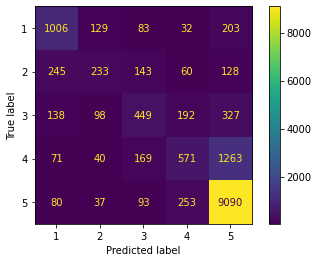

In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(tfidf, (df['Score'].values), test_size=0.3, shuffle=True)

SVM = svm.SVC(C= 10, gamma= 0.1, kernel= 'rbf')

# Training
SVM.fit(X_train, y_train)

# Prediction
result = SVM.predict(X_test)

print(classification_report(y_test, result, labels=[1,2,3,4,5]))
cm = confusion_matrix(y_test, result, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1","2","3","4","5"])
disp.plot()

### 5.1.2. NGRAM

              precision    recall  f1-score   support

           1       0.69      0.80      0.74      1387
           2       0.68      0.36      0.47       857
           3       0.64      0.59      0.61      1251
           4       0.78      0.70      0.74      2181
           5       0.95      1.00      0.97      9457

    accuracy                           0.87     15133
   macro avg       0.75      0.69      0.71     15133
weighted avg       0.86      0.87      0.86     15133



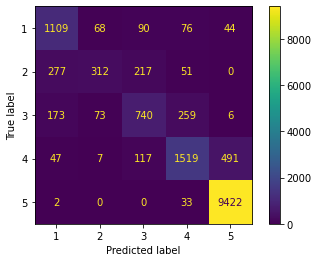

In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ngram, df['Score'].values, test_size=0.3, shuffle=True)

SVM = svm.SVC(C= 10, gamma= 0.1, kernel= 'rbf')

# Training
SVM.fit(X_train, y_train)

# Prediction
result = SVM.predict(X_test)

print(classification_report(y_test, result, labels=[1,2,3,4,5]))
cm = confusion_matrix(y_test, result, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1","2","3","4","5"])
disp.plot()

### 5.1.3. Pos Tagging

              precision    recall  f1-score   support

           1       0.70      0.77      0.73      1430
           2       0.56      0.36      0.44       801
           3       0.59      0.48      0.53      1205
           4       0.66      0.57      0.61      2147
           5       0.92      0.98      0.95      9550

    accuracy                           0.83     15133
   macro avg       0.68      0.63      0.65     15133
weighted avg       0.81      0.83      0.82     15133



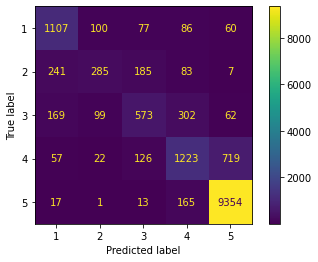

In [84]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(pos_tag, df['Score'].values, test_size=0.3, shuffle=True)

SVM = svm.SVC(C= 10, gamma= 0.1, kernel= 'rbf')

# Training
SVM.fit(X_train, y_train)

# Prediction
result = SVM.predict(X_test)

print(classification_report(y_test, result, labels=[1,2,3,4,5]))
cm = confusion_matrix(y_test, result, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1","2","3","4","5"])
disp.plot()

In [100]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary+Text,tokens,post_tag
0,1,b001e4kfg0,a3sgxh7auhu8gw,delmartian,1.0,1.0,5.0,1.303862e+09,good quality dog food,i have bought several of the vitality canned d...,good quality dog food i have buy several of th...,"[good, quality, dog, food, i, have, buy, sever...",good:JJ quality:NN dog:NN food:NN i:NN have:V...
1,2,b00813grg4,a1d87f6zcve5nk,dll pa,0.0,0.0,1.0,1.346976e+09,not as advertised,product arrived labeled as jumbo salted peanut...,not as advertise product arrive label as jumbo...,"[not, as, advertise, product, arrive, label, a...",not:RB as:IN advertise:NN product:NN arrive:J...
2,3,b000lqoch0,abxlmwjixxain,"natalia corres ""natalia corres""",1.0,1.0,4.0,1.219018e+09,"""delight"" says it all",this is a confection that has been around a fe...,"""delight"" say it all this be a confection that...","[``, delight, '', say, it, all, this, be, a, c...",``:`` delight:NN '':'' say:VBP it:PRP all:PDT...
3,4,b000ua0qiq,a395borc6fgvxv,karl,3.0,3.0,2.0,1.307923e+09,cough medicine,if you are looking for the secret ingredient i...,cough medicine if you be look for the secret i...,"[cough, medicine, if, you, be, look, for, the,...",cough:NN medicine:NN if:IN you:PRP be:VB look...
4,5,b006k2zz7k,a1uqrsclf8gw1t,"michael d. bigham ""m. wassir""",0.0,0.0,5.0,1.350778e+09,great taffy,great taffy at a great price. there was a wid...,great taffy great taffy at a great price. ther...,"[great, taffy, great, taffy, at, a, great, pri...",great:JJ taffy:JJ great:JJ taffy:NN at:IN a:D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50803,50818,b003e75y5c,aaj13sjo99h9k,dr2,0.0,0.0,5.0,1.342138e+09,love love love this food.,my persian loves this food and it's not all ov...,love love love this food. my persian love this...,"[love, love, love, this, food, ., my, persian,...",love:VB love:NN love:NN this:DT food:NN .:. m...
50804,50819,b003e75y5c,a5dhs3eqlctxq,grannaof4,0.0,0.0,5.0,1.342051e+09,cats love it,my persian gavin plus the non-persian ellie bo...,cat love it my persian gavin plus the non-pers...,"[cat, love, it, my, persian, gavin, plus, the,...",cat:NN love:VB it:PRP my:PRP$ persian:JJ gavi...
50805,50820,b0052y3zi8,a1ymjxuontrbez,sarah,0.0,0.0,5.0,1.322179e+09,fruit snacks,i used to get these with my lunch at school ev...,fruit snack i use to get these with my lunch a...,"[fruit, snack, i, use, to, get, these, with, m...",fruit:NN snack:NN i:NN use:VBP to:TO get:VB t...
50806,50821,b0000di0gg,a3ajgub55sn4hp,"paulette stanley ""ecogeeko""",2.0,3.0,5.0,1.247530e+09,...sweet dreams...,"...indeed, this syrup has a wonderful smooth t...","...sweet dreams... ...indeed, this syrup have ...","[..., sweet, dreams, ..., ..., indeed, ,, this...",...:: sweet:NN dreams:NNS ...:: ...:: indeed:...
